# lm function
 : data classified into groups (Chapter 7) as well as to (multiple) linear regression (Chapters 6 and 11) problems,
 => 하지만 일반화 모델이라 하기에는 무리가 있다..그래서 다항회귀모형이 필요.
![Regression model](http://image.slidesharecdn.com/polynomialregression-150118112131-conversion-gate01/95/polynomial-regression-10-638.jpg?cb=1421580230)

## 12.1 Polynomial regression (다항회귀모형)

y = α + β1x + β2x2 + · · · + βkxk + e (2차항 이상의 연관성)

example:  
 lm(y ~ x + I(X^2))


In [22]:
library(ISwR)
attach(cystfibr)
summary(lm(pemax~height+I(height^2))) # 2차 방정식 꼴임.

The following object is masked from package:ISwR:

    tlc




Call:
lm(formula = pemax ~ height + I(height^2))

Residuals:
    Min      1Q  Median      3Q     Max 
-51.411 -14.932  -2.288  12.787  44.933 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept) 615.36248  240.95580   2.554   0.0181 *
height       -8.08324    3.32052  -2.434   0.0235 *
I(height^2)   0.03064    0.01126   2.721   0.0125 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 24.18 on 22 degrees of freedom
Multiple R-squared:  0.5205,	Adjusted R-squared:  0.4769 
F-statistic: 11.94 on 2 and 22 DF,  p-value: 0.0003081


=> 여기에 있는 p-value를 분석에 적용할 수 없음. height 와 height^2 간의 상관관계는 높을 수 밖에 없는데, 이 같이 중복된 정보를 모형에 넣는 것은 낭비이고, 계산상으로 문제를 일으킬 수 있음.

In [23]:
# To draw a plot of the fitted curve with prediction and confidence bands, we can use "predict".

pred.frame <- data.frame(height=seq(110,180,2)) # 키가 110 ~ 180 cm 을 2cm 간격으로 선택하고  height 변수로 sorting 한다.

lm.pemax.hq <- lm(pemax~height+I(height^2)) # lm function 을 이용해 2차방정식의 값을 구한다.

predict(lm.pemax.hq,interval="pred",newdata=pred.frame) # predict function 을 이용하여 fit 값을 구한다.

,fit,lwr,upr
1,96.90026,37.94461,155.85591
2,94.33611,36.82985,151.84237
3,92.01705,35.73077,148.30332
4,89.94307,34.66449,145.22165
5,88.11418,33.65007,142.57829
6,86.53038,32.70806,140.35270
7,85.19166,31.85979,138.52353
8,84.09803,31.12689,137.06918
9,83.24949,30.53064,135.96835
10,82.64604,30.09150,135.20058


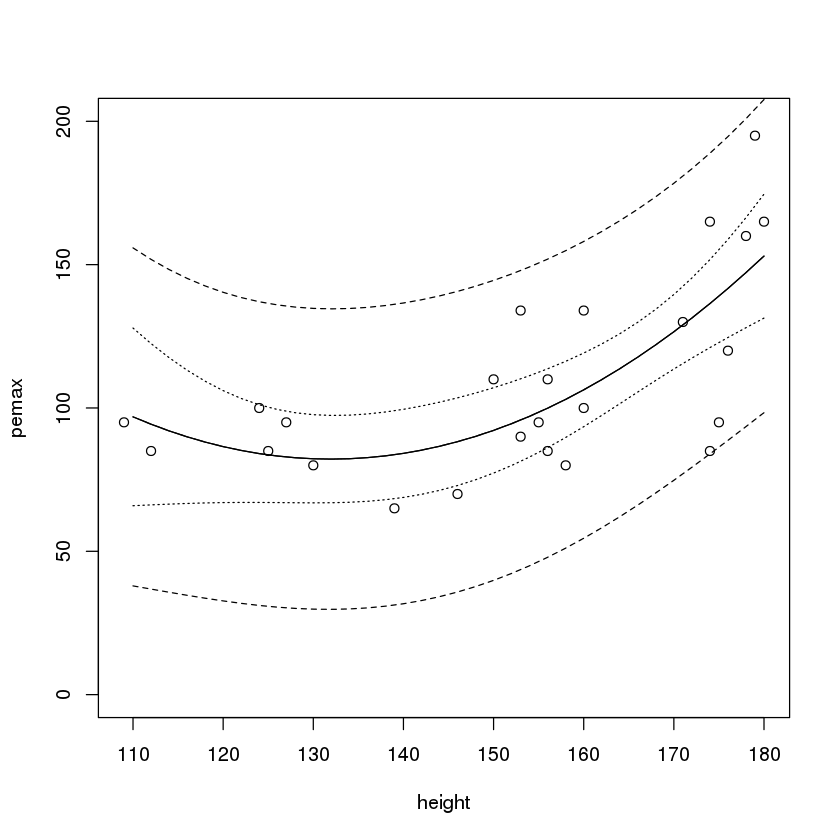

In [4]:
pp <- predict(lm.pemax.hq,newdata=pred.frame,interval="pred") # prediction 계산

pc <- predict(lm.pemax.hq,newdata=pred.frame,interval="conf") # confidence 계산

plot(height,pemax,ylim=c(0,200)) # pemax plot 을 그림

matlines(pred.frame$height,pp,lty=c(1,2,2),col="black") # prediction 라인을 그린다.

matlines(pred.frame$height,pc,lty=c(1,3,3),col="black") # confidence 라인을 그린다.



## 12.2 Regression through the origin

때때로 regression line이 (0,0) 에서 시작하는 것이 합리적일 때가 있다.
이때는 minus intercept개념을 도입하여 y ~ x - 1 로 생각. (intercept 가 constantly 1이다)

### 아래의 예제는 y = 2x + e 의 linear relationship을 지닌 예제임.

In [7]:
x <- runif(20) #random number 20까지 선택

y <- 2*x+rnorm(20,0,0.3) #정규분포를 따르는 random number 를 0, 0.3 을 기준으로 20개 발생.

head(x)
head(y)
summary(lm(y~x))
summary(lm(y~x-1)) # minus intercept 도입 => intercept 를 없앤다. 

[1] 0.7528417 0.8013158 0.9836499 0.1267203 0.6461874 0.4007452

[1] 1.6113951 1.6653757 1.6148228 0.4724834 1.7454948 0.2727370


Call:
lm(formula = y ~ x)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.68522 -0.13367 -0.01368  0.25366  0.56405 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.08818    0.16206   0.544    0.593    
x            2.08343    0.27984   7.445 6.72e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3513 on 18 degrees of freedom
Multiple R-squared:  0.7549,	Adjusted R-squared:  0.7412 
F-statistic: 55.43 on 1 and 18 DF,  p-value: 6.718e-07



Call:
lm(formula = y ~ x - 1)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.67167 -0.10071  0.03045  0.23843  0.62877 

Coefficients:
  Estimate Std. Error t value Pr(>|t|)    
x   2.2166     0.1331   16.66 8.62e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3447 on 19 degrees of freedom
Multiple R-squared:  0.9359,	Adjusted R-squared:  0.9325 
F-statistic: 277.4 on 1 and 19 DF,  p-value: 8.616e-13


## intercept를 강제로 zero에 맞췄더니 정확도 R-Squared 값이 상승한다.   
### => 이렇게 볼수 만은 없다. 아래 비교한 ANOVA Table을 보자.



In [9]:
anova(lm(y~x))
anova(lm(y~x-1))

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
x,1,6.838555,6.838555,55.42784,6.717926e-07
Residuals,18,2.220797,0.1233776,NA,NA


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
x,1,32.95547,32.95547,277.3874,8.616348e-13
Residuals,19,2.257327,0.1188067,NA,NA


## Total sum of squares 과 the total number of degrees of freedom 이 두 분석에서 같지 않다. 


## 12.3 Design matrices and dummy variables

In [12]:
attach(cystfibr)
model.matrix(pemax~height+weight)
attr(,"assign")

The following objects are masked from cystfibr (pos = 3):

    age, bmp, fev1, frc, height, pemax, rv, sex, tlc, weight

The following object is masked from package:ISwR:

    tlc



,(Intercept),height,weight
1,1.0,109.0,13.1
2,1.0,112.0,12.9
3,1.0,124.0,14.1
4,1.0,125.0,16.2
5,1.0,127.0,21.5
6,1.0,130.0,17.5
7,1.0,139.0,30.7
8,1.0,150.0,28.4
9,1.0,146.0,25.1
10,1.0,155.0,31.5


ERROR: Error in attr(, "assign"): 인자 1는 비어있습니다


## 12.4 Linearity over groups

- 나이 같은 데이터는 continous 하지만, 몇개의 group으로 묶여 있을 수 있다. 이럴 경우 linear regression에 약간의 문제가 있을수 있음.   

- 여기서는 age gorup 에 따른 trypsin concentrations 데이터 (Alt-man, 1991, p. 212) 를 사용하며 데이터는 6 그룹으로 묶여 있으며 이것에 대한 mean 값과 SD 값이 주어짐. => 데이터 핸들링이 어려우므로 같은 SD 와 Mean값을 가지는 fake data 생성하였다.



In [15]:
attach(fake.trypsin)
summary(fake.trypsin)
head(fake.trypsin) 

The following objects are masked from fake.trypsin (pos = 3):

    grp, grpf, trypsin



    trypsin            grp        grpf   
 Min.   :-39.96   Min.   :1.000   1: 32  
 1st Qu.:119.52   1st Qu.:2.000   2:137  
 Median :167.59   Median :2.000   3: 38  
 Mean   :168.68   Mean   :2.583   4: 44  
 3rd Qu.:213.98   3rd Qu.:3.000   5: 16  
 Max.   :390.13   Max.   :6.000   6:  4  

,trypsin,grp,grpf
1,137.3472,1,1
2,86.95211,1,1
3,82.38924,1,1
4,127.193,1,1
5,123.487,1,1
6,177.0802,1,1


## grp => numeric vector

## grpf => categorical vector

In [16]:
anova(lm(trypsin~grpf)) # one-way ANOVA  를 실행

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
grpf,5,224103.1,44820.61,13.50829,9.591749e-12
Residuals,265,879271.9,3318.007,NA,NA


In [17]:
anova(lm(trypsin~grp)) # one-way ANOVA  를 실행

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
grp,1,206698.4,206698.4,62.00883,8.451137e-14
Residuals,269,896676.6,3333.37,NA,NA


## - 두개의 모델의 잔차가 거의 바뀌지 않았다는 것은 두개의 모델이 동일하게 데이터를 잘 설명하고 있다는 것이다.

In [18]:
model1 <- lm(trypsin~grp)

model2 <- lm(trypsin~grpf)

anova(model1,model2) # 두개의 모델을 비교해본다. 

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
1,269,896676.6,NA,NA,NA,NA
2,265,879271.9,4,17404.67,1.31138,0.2660543


## 두개의 모델을 각각 비교하였을때는, 큰 차이를 발견할수 없다. 

## 아래의 방법으로 두 모델을 비교해 볼수도 있다.

In [19]:
anova(lm(trypsin~grp+grpf))

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
grp,1,206698.4,206698.4,62.29595,7.832995e-14
grpf,4,17404.67,4351.167,1.31138,0.2660543
Residuals,265,879271.9,3318.007,NA,NA


## Graphic 표현
### 아래서 사용된 graphical techniques 은 7장의 FIgure7.1 에서 사용된 것과 동일함.

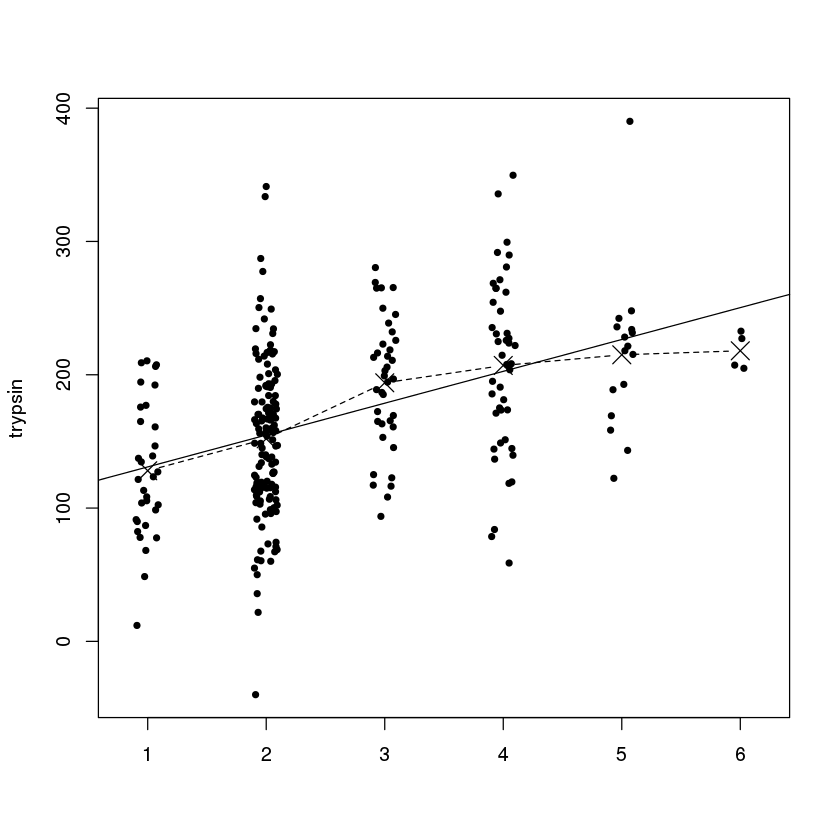

In [20]:
xbar.trypsin <- tapply(trypsin,grpf,mean)

stripchart(trypsin~grp, method="jitter",jitter=.1, vertical=T, pch=20)

lines(1:6,xbar.trypsin,type="b",pch=4,cex=2,lty=2) # 실제 mean 값을 따른선

abline(lm(trypsin~grp)) # linear model의 선.

## 12.5 Interactions
- multiple regression 에서 기본 가정은 term이  additively 작용한다는점이다.
- *interaction terms : *다른 변수로부터 만들어진 새로운 변수 for example, a:b , a+b+a:b

1. Interaction between two factors. : simple, 그냥 둘의 관계
2. Interaction between a factor and a numeric variable. : 각 그룹에서 differen linear slope 을 가진다. 
3. Interaction between two continuous variables.: 이상한(peculiar) model 이 만들어진다. 하나가 constant 할경우 다른 factor가 linear effect 가진다는 등...

### (1) Ratio measures (multiplicative interaction)

### (2) Difference measures (additive interaction) 
![no additive interaction](https://www.ctspedia.org/wiki/pub/CTSpedia/InterMultipl/0413_7mult_noadd.JPG)
![additive interaction](https://www.ctspedia.org/wiki/pub/CTSpedia/InterMultipl/0413_8addinter.JPG)
![qualitative interaction](https://www.ctspedia.org/wiki/pub/CTSpedia/InterMultipl/0413_11qual.JPG)

## 12.6 Two-way ANOVA with replication (이원분산분석)
- The coking data set comes from Johnson (1994, Section 13.1)

- 일원분산분석의 확장판의 개념으로 두 그룹변수들의 효과 뿐만아니라 두 그룹변수들이 서로 어떤 영향을 미치는지 교호작용 (interaction) 을 볼수 있다.


In [8]:
attach(coking)
head(coking)# 데이터 확인.
anova(lm(time~width*temp)) # interaction terms test.

,width,temp,time
1,4,1600,3.5
2,4,1600,3
3,4,1600,2.7
4,4,1900,2.2
5,4,1900,2.3
6,4,1900,2.4


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
width,2,123.1433,61.57167,222.1022,3.312307e-10
temp,1,17.20889,17.20889,62.07615,4.394167e-06
width:temp,2,5.701111,2.850556,10.28257,0.002503632
Residuals,12,3.326667,0.2772222,NA,NA


In [25]:
tapply(time,list(width,temp),mean) # 시간에 따른 변화 정도가 다르다

,1600,1900
4,3.066667,2.300000
8,7.166667,5.533333
12,10.800000,7.333333


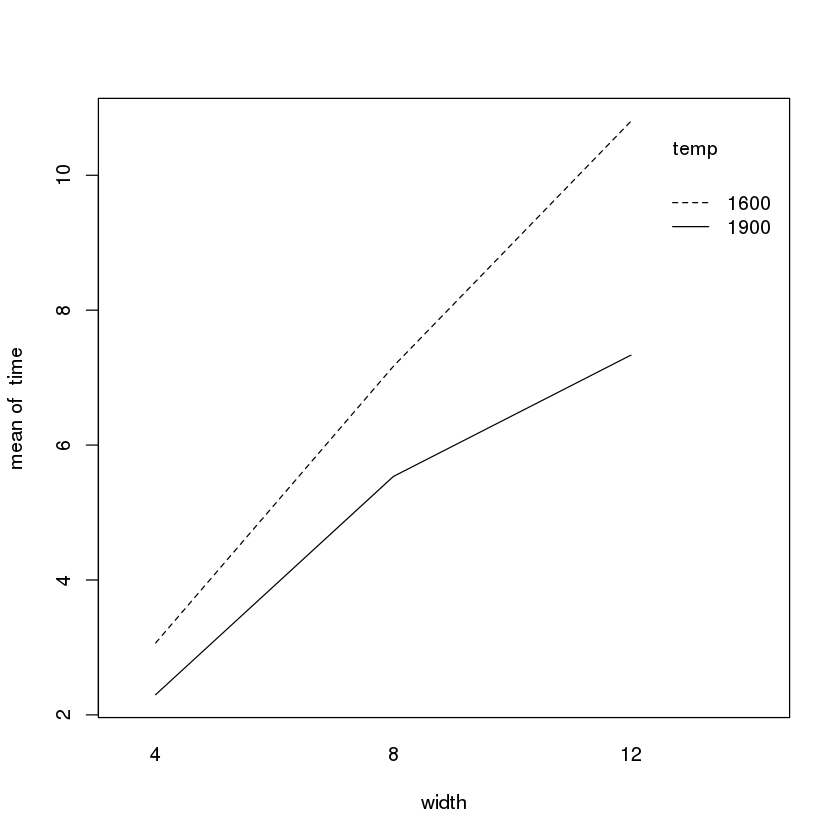

In [12]:
interaction.plot(width, temp, time) # 책에는 없으나...그림으로 확인하고싶으면 => temp 에 따른 additive interaction이 있다.

- Temp 변수에 따라 (온도의 높고 낮음에 따라) width 가 영향을 받는다. 두 변수는 상호 독립적이지 않다. 
 => 전체에서 각 변수를 test 하는 것은 의미가 없다. 온도가 높고 낮음에 따라 달리 평가해야.
 => 만약 interaction test 가 의미가 없다면, 그냥 진행하면 된다.

## 12.7 Analysis of covariance (공분산 분석)

공분산 분석의 목적
 : 분산 분석에 연속형 변수를 추가
  => 각 그룹의 평균들의 차이가 있는지 검정한는 것으로 분산분석과 동일하나, 통제가 되지 않는 연속형 변수들(covariate)를 추가하여 오차를 줄이고 검정력을 높인다. 
  
 
- 여기서 사용하는 데이터는 Tetrahymena cells 의 성장환경으로 glucose 가 medium에 첨가되어 있는지 안되어있는지에 따른  average cell diameter (μ) and cell concentration (count per ml) 를 표시한 것임.


In [14]:
library(ISwR) # CONC: Concentration, diameter: cell diameter 의 평균값
hellung

,glucose,conc,diameter
1,1,631000,21.2
2,1,592000,21.5
3,1,563000,21.3
4,1,475000,21
5,1,461000,21.5
6,1,416000,21.3
7,1,385000,20.3
8,1,321000,22.7
9,1,302000,21.5
10,1,199000,22.2


In [16]:
summary(hellung) 
# concentration 변수가 ancova 에서 covariate로 작용.
# no missing value, but concentration 변수는 right skewed 되어 있는 모양.
# glucose 도 numeric 변수 처리되어있음. 

    glucose           conc           diameter    
 Min.   :1.000   Min.   : 11000   Min.   :19.20  
 1st Qu.:1.000   1st Qu.: 27500   1st Qu.:21.40  
 Median :1.000   Median : 69000   Median :23.30  
 Mean   :1.373   Mean   :164326   Mean   :23.00  
 3rd Qu.:2.000   3rd Qu.:243000   3rd Qu.:24.35  
 Max.   :2.000   Max.   :631000   Max.   :26.30  

In [17]:
# 먼저 glucose 를 yes or no 로 할당.
hellung$glucose <- factor(hellung$glucose, labels=c("Yes","No"))
summary(hellung)

 glucose       conc           diameter    
 Yes:32   Min.   : 11000   Min.   :19.20  
 No :19   1st Qu.: 27500   1st Qu.:21.40  
          Median : 69000   Median :23.30  
          Mean   :164326   Mean   :23.00  
          3rd Qu.:243000   3rd Qu.:24.35  
          Max.   :631000   Max.   :26.30  

#### 12.7.1 Graphical description

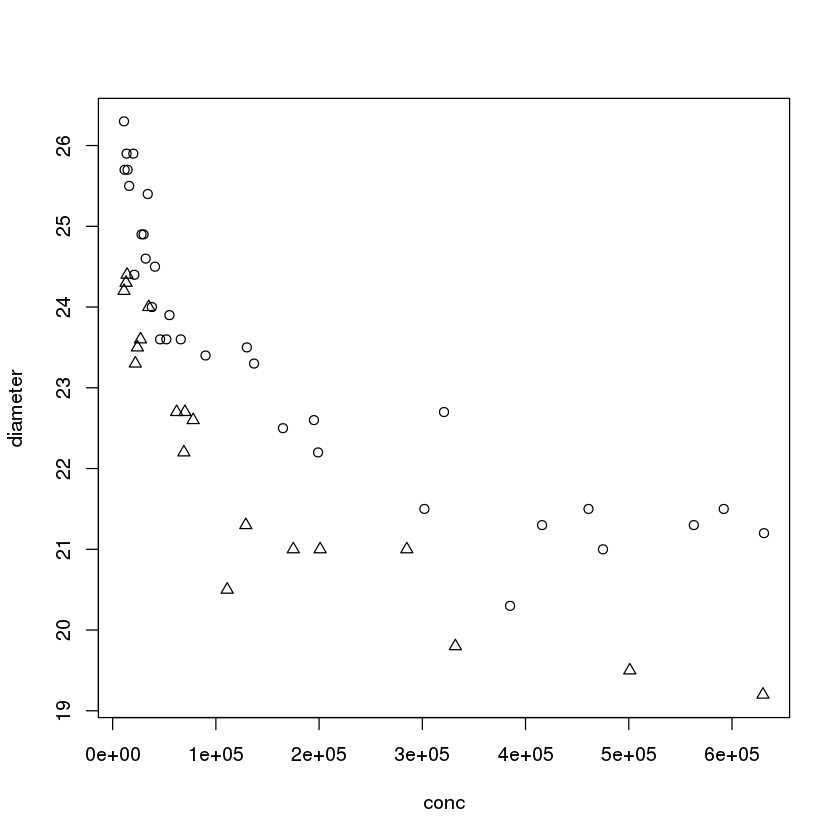

In [18]:
attach(hellung)
plot(conc,diameter,pch=as.numeric(glucose)) # 1은 동그라미로, 2는 세모로 표현됨.보기 어려우니까 아래 식으로 legend 추가하자.


ERROR: Error in legend(locator(n = 1), legend = c("glucose", "no glucose"), pch = 1:2): invalid coordinate lengths


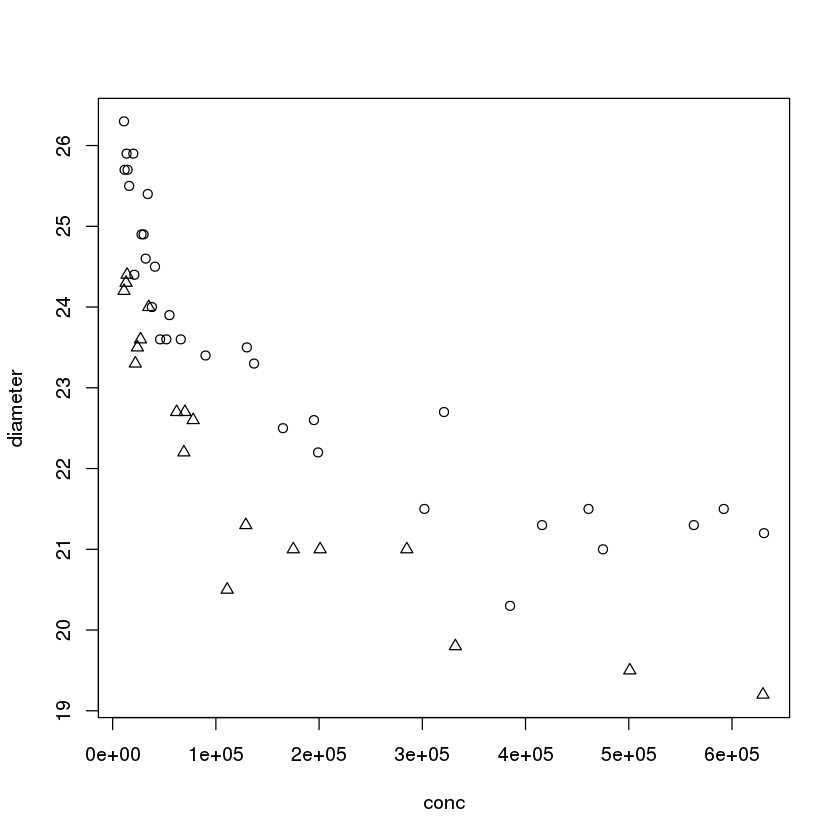

In [19]:
plot(conc,diameter,pch=as.numeric(glucose)) 
legend(locator(n=1),legend=c("glucose","no glucose"),pch=1:2)

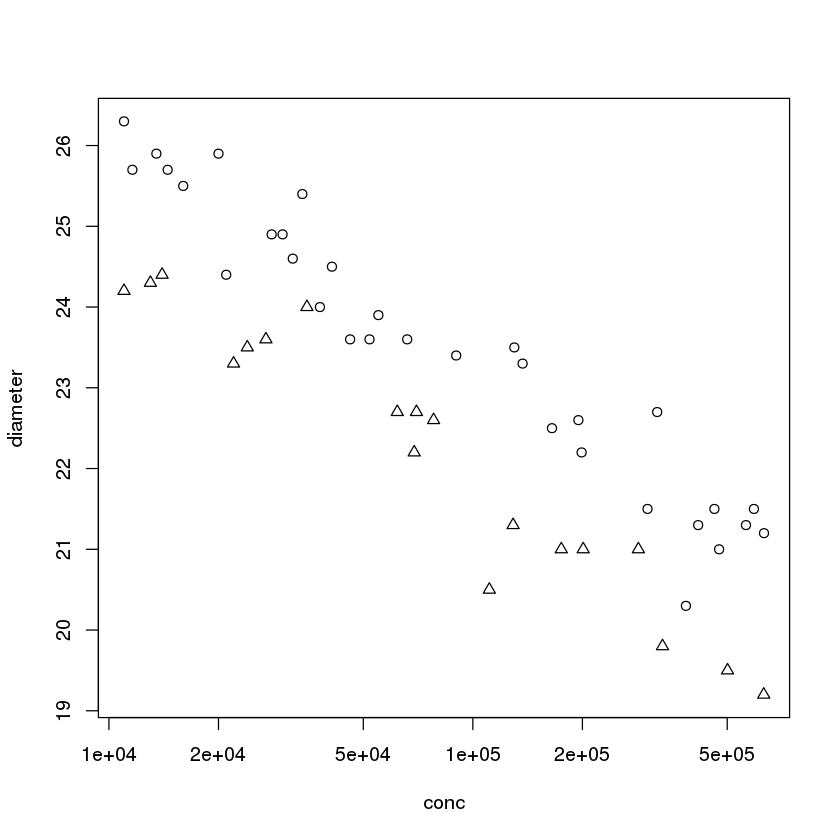

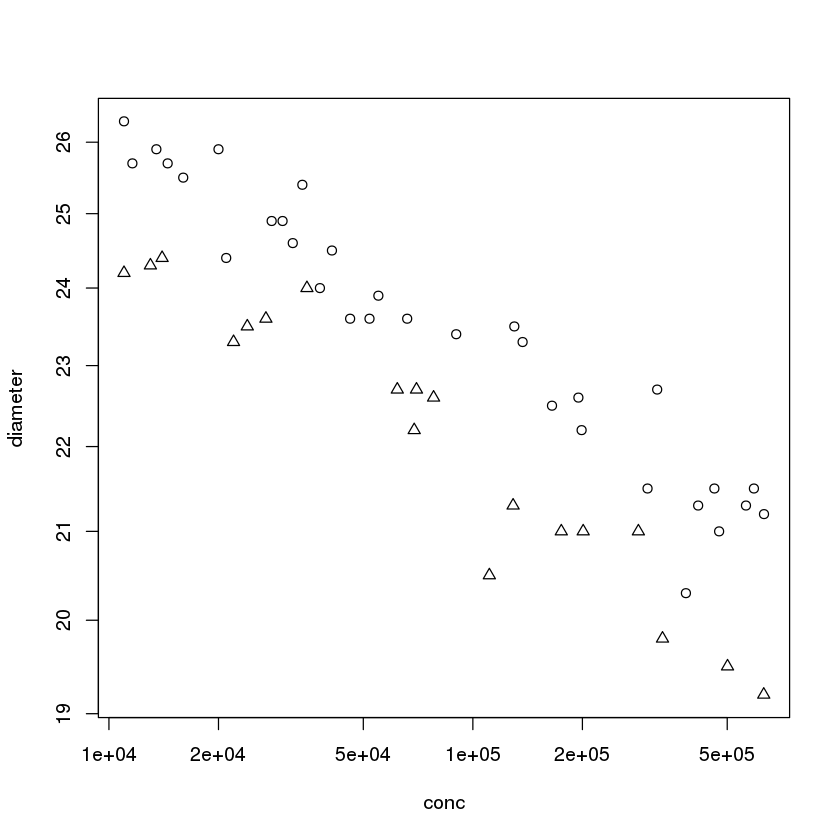

In [20]:
# You get a much nicer plot (Figure 12.4) by using a logarithmic x-axis => 좀 더 linear 해 본인다. (concentration 변수는 보통 Log값을취함)
plot(conc,diameter,pch=as.numeric(glucose),log="x")
# log-log plot
plot(conc,diameter,pch=as.numeric(glucose),log="xy")

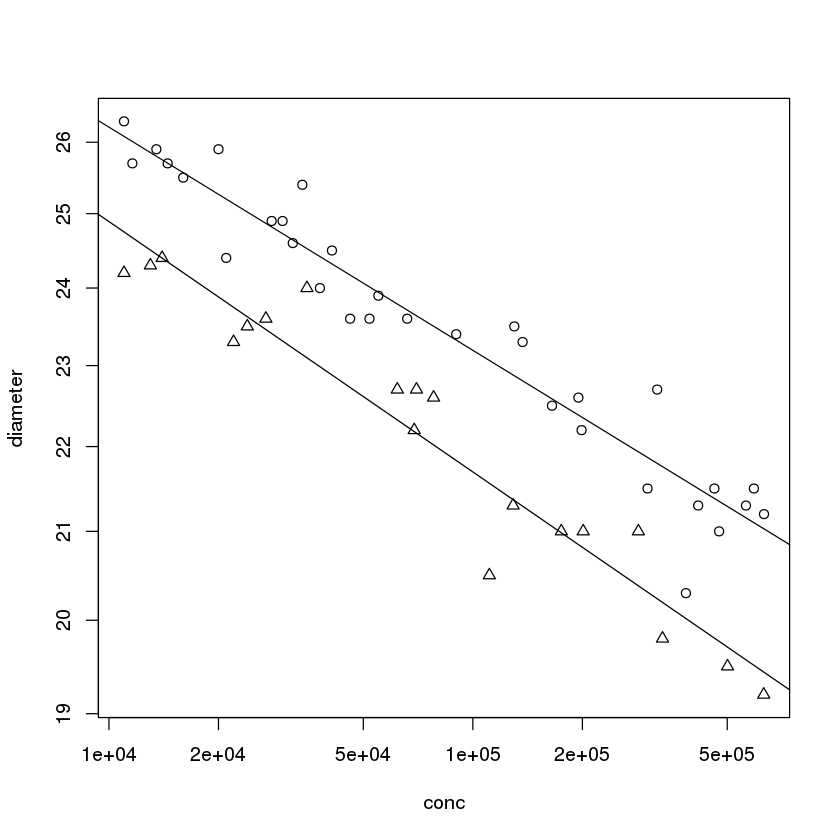

In [11]:
plot(conc,diameter,pch=as.numeric(glucose),log="xy")
# 그래프에 linear line 을 추가하고 싶은경우, abline명령어를 이용한다. 

# 데이터를 glucose를 기준으로 2그룹으로 나눈다.
tethym.gluc <- hellung[glucose=="Yes",]
tethym.nogluc <- hellung[glucose=="No",]

# 각 그룹의 linear line 을 설정한다. 

lm.nogluc <- lm(log10(diameter)~ log10(conc),data=tethym.nogluc)
lm.gluc <- lm(log10(diameter)~ log10(conc),data=tethym.gluc)

# line을 그린다.
abline(lm.nogluc)
abline(lm.gluc)

#### 12.7.2 Comparison of regression lines

In [12]:
summary(lm(log10(diameter)~ log10(conc), data=tethym.gluc))
summary(lm(log10(diameter)~ log10(conc), data=tethym.nogluc))


Call:
lm(formula = log10(diameter) ~ log10(conc), data = tethym.gluc)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0267219 -0.0043361  0.0006891  0.0035489  0.0176077 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.63134    0.01345  121.29   <2e-16 ***
log10(conc) -0.05320    0.00272  -19.56   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.008779 on 30 degrees of freedom
Multiple R-squared:  0.9273,	Adjusted R-squared:  0.9248 
F-statistic: 382.5 on 1 and 30 DF,  p-value: < 2.2e-16



Call:
lm(formula = log10(diameter) ~ log10(conc), data = tethym.nogluc)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.021919 -0.004977  0.000056  0.005597  0.016625 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.634761   0.020209   80.89  < 2e-16 ***
log10(conc) -0.059677   0.004125  -14.47 5.48e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.009532 on 17 degrees of freedom
Multiple R-squared:  0.9249,	Adjusted R-squared:  0.9205 
F-statistic: 209.3 on 1 and 17 DF,  p-value: 5.482e-11


#### 두개의 모델이 다른점을 찾는 방법

### 1. Estimate log10값의 차이 => 0.0065
### 2. std err => 0.0049
### 3. t= 0.0065/0.0049 = 1.3



- 하지만 subgroup에서 차이를 보는 것 보다, 먼저 전체 데이터셋에서 모델을 만들고 차이를 찾도록 하자. 즉 interaction term이 의미가 있어야 한다.


In [14]:
summary(lm(log10(diameter)~log10(conc)*glucose)) # interaction term



Call:
lm(formula = log10(diameter) ~ log10(conc) * glucose)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.026722 -0.004888  0.000056  0.003767  0.017608 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)            1.631344   0.013879 117.543   <2e-16 ***
log10(conc)           -0.053196   0.002807 -18.954   <2e-16 ***
glucoseNo              0.003418   0.023695   0.144    0.886    
log10(conc):glucoseNo -0.006480   0.004821  -1.344    0.185    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.009059 on 47 degrees of freedom
Multiple R-squared:  0.9361,	Adjusted R-squared:  0.9321 
F-statistic: 229.6 on 3 and 47 DF,  p-value: < 2.2e-16


1. The intercept, 1.6313

2. −0.0532 × log10 C

3. 0.0034, but only for a culture without glucose

4. −0.0065 × log10 C, but only for cultures without glucose


#### for cell cultures with glucose
 => log10 D = 1.6313 − 0.0532 × log10 C
 
#### for cell cultures without glucose
 => log10 D = (1.6313 + 0.0034) − (0.0532 + 0.0065) × log10 C

In [15]:
# ANCOVA시행전 variance 차이 => 없다.
var.test(lm.gluc,lm.nogluc)


	F test to compare two variances

data:  lm.gluc and lm.nogluc
F = 0.84817, num df = 30, denom df = 17, p-value = 0.6731
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.3389901 1.9129940
sample estimates:
ratio of variances 
         0.8481674 


In [16]:
anova(lm(log10(diameter)~ log10(conc)*glucose)) # interaction term 이 의미를 갖지 않는다. 즉, 차이가 없다.

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
log10(conc),1,0.04689049,0.04689049,571.4356,6.010325e-28
glucose,1,0.009493827,0.009493827,115.6975,2.890205e-14
log10(conc):glucose,1,0.0001482767,0.0001482767,1.806989,0.1853226
Residuals,47,0.003856695,8.205734e-05,NA,NA


## 12.8 Diagnostics

Regression diagnostics are used to evaluate the model assumptions and investigate whether or not there are observations with a large influence on the analysis.

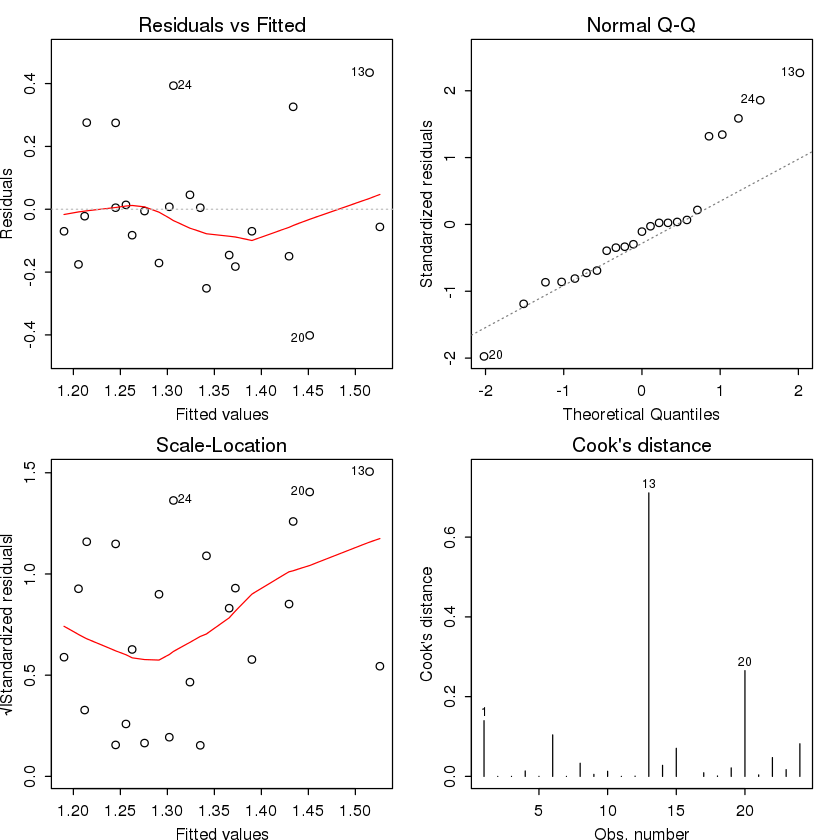

In [2]:
# basic concept

library(ISwR)

attach(thuesen)

options(na.action="na.exclude")

lm.velo <- lm(short.velocity~blood.glucose) # 기본적인 diagnostic plot

opar <- par(mfrow=c(2,2), mex=0.6, mar=c(4,4,3,2)+.3) # par 로 2 x 2 layout을 준비한다. 

plot(lm.velo, which=1:4) # plot을 그린다. 

par(opar)

## 잔차 (Residuals) : 관찰치와 추정치의 차이 
    => 잘 적합된 모형에서 나온 잔차는 정규분포를 따라야 하고 분산이 일정하고 특별한 추제를 보이지 않아야!

### 잔차가 추세를 보인다면 모형에 포함되어야 할 정보가 빠져있을 가능성이 있다.

1. residuals versus fitted values.

2. Q–Q normal distribution plot of standardized residuals.: 직선에 붙어있을수록 normal distribution.

3. square root of the absolute value of the standardized residuals; skewness 와 distribution을 좀더 쉽게 찾을수 있게 해준다.

4. “Cook’s distance”, regression coefficients 에 미치는 영향을 각 observation에 대해 표시한것.

The following objects are masked from thuesen (pos = 7):

    blood.glucose, short.velocity

The following objects are masked from thuesen (pos = 8):

    blood.glucose, short.velocity



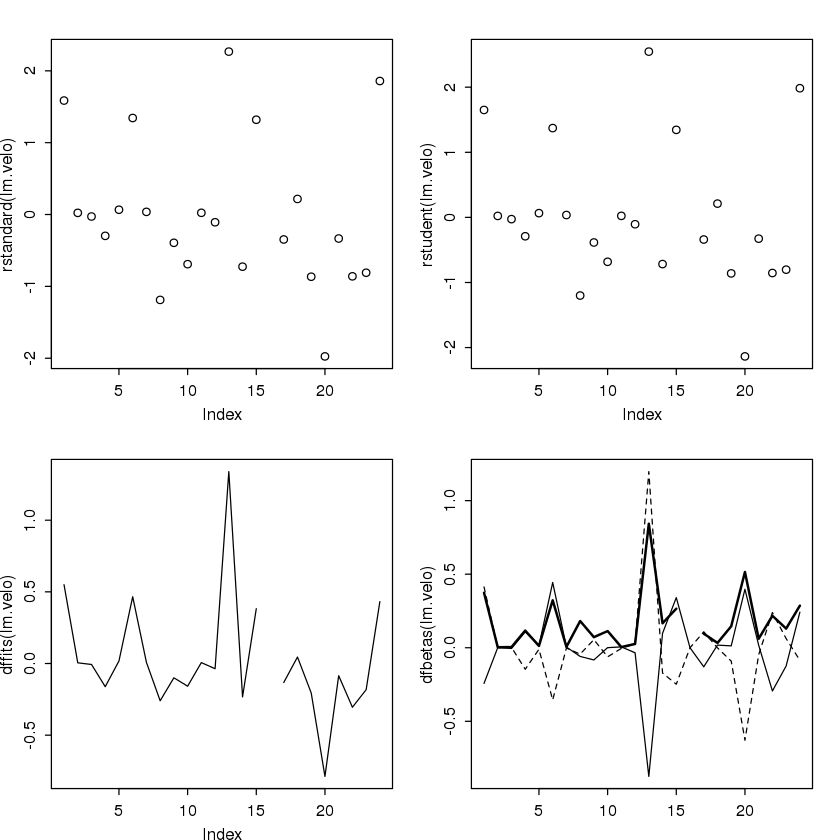

In [24]:
library(ISwR)

attach(thuesen)

options(na.action="na.exclude")

lm.velo <- lm(short.velocity~blood.glucose)

opar <- par(mfrow=c(2,2), mex=0.6, mar=c(4,4,3,2)+.3)

plot(rstandard(lm.velo))

plot(rstudent(lm.velo))

plot(dffits(lm.velo),type="l")

matplot(dfbetas(lm.velo),type="l", col="black")

lines(sqrt(cooks.distance(lm.velo)), lwd=2)

par(opar)

1. standardized residuals
2. rstudent :leave-out-one residuals => model이 맞다면 student t distribution을 따라야한다.
3. an observation affects the associated fitted value : 앞에서 보면 13, 20 번이 튀는 변수 => 여기서는 gap을 보면된다. 16번은 missing value임.
4. dfbetas 는 regression coefficience에 미치는 영향정도를 표시.